In [382]:
import pandas as pd
import matplotlib.pyplot as plt

In [383]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df = pd.read_parquet(r"../../../data/test_data.parquet")

In [384]:
df.shape

(45, 182)

In [385]:
df.tail(15)

,gameCreation,gameEndTimestamp,gameDuration,gameVersion,kills,deaths,assists,championName,firstBloodAssist,firstBloodKill,firstTowerAssist,firstTowerKill,gameEndedInEarlySurrender,gameEndedInSurrender,goldEarned,magicDamageDealtToChampions,physicalDamageDealtToChampions,teamEarlySurrendered,teamPosition,totalDamageDealtToChampions,totalTimeSpentDead,wardsKilled,wardsPlaced,win,teamId,enemyTopPick,enemyJunglePick,enemyMiddlePick,enemyBottomPick,enemySupportPick,allyTopPick,allyJunglePick,allyMiddlePick,allyBottomPick,allySupportPick,laneOpponent,enemyTopBan,enemyJungleBan,enemyMiddleBan,enemyBottomBan,enemySupportBan,allyTopBan,allyJungleBan,allyMiddleBan,allyBottomBan,allySupportBan,Maxi,Moritz,Niclas,Aaron,totalAllyTeamKills,totalAllyTeamDeaths,gold@0,gold@1,gold@2,gold@3,gold@4,gold@5,gold@6,gold@7,gold@8,gold@9,gold@10,gold@11,gold@12,gold@13,gold@14,gold@15,gold@16,gold@17,gold@18,gold@19,gold@20,gold@21,gold@22,gold@23,gold@24,gold@25,gold@26,gold@27,gold@28,gold@29,gold@30,gold@31,gold@32,gold_diff@0,gold_diff@1,gold_diff@2,gold_diff@3,gold_diff@4,gold_diff@5,gold_diff@6,gold_diff@7,gold_diff@8,gold_diff@9,gold_diff@10,gold_diff@11,gold_diff@12,gold_diff@13,gold_diff@14,gold_diff@15,gold_diff@16,gold_diff@17,gold_diff@18,gold_diff@19,gold_diff@20,gold_diff@21,gold_diff@22,gold_diff@23,gold_diff@24,gold_diff@25,gold_diff@26,gold_diff@27,gold_diff@28,gold_diff@29,gold_diff@30,gold_diff@31,gold_diff@32,cs@0,cs@1,cs@2,cs@3,cs@4,cs@5,cs@6,cs@7,cs@8,cs@9,cs@10,cs@11,cs@12,cs@13,cs@14,cs@15,cs@16,cs@17,cs@18,cs@19,cs@20,cs@21,cs@22,cs@23,cs@24,cs@25,cs@26,cs@27,cs@28,cs@29,cs@30,cs@31,cs@32,deathBeforeMin5,totalTeamGoldDiff@5,totalTeamGoldDiff@10,totalTeamGoldDiff@15,totalTeamGoldDiff@20,puuid,gold@33,gold_diff@33,cs@33,gold@34,gold_diff@34,cs@34,gold@35,gold@36,gold@37,gold@38,gold_diff@35,gold_diff@36,gold_diff@37,gold_diff@38,cs@35,cs@36,cs@37,cs@38,gold@39,gold_diff@39,cs@39,gameDuration_m_s,onBlueSide,timeBetweenGames,session
matchId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
EUW1_6687907833,2023-11-22 23:52:45,2023-11-23 00:18:09,1448,13.23,4,5,15,Brand,False,False,False,False,False,False,11984,14134,644,False,JUNGLE,15806,89,0,6,True,100,Yone,Graves,Ahri,Vayne,Rell,Sylas,Brand,Yasuo,Draven,Pyke,Graves,RekSai,Syndra,Nocturne,Senna,Jax,Belveth,Xayah,Rakan,Leblanc,KSante,False,False,False,False,33,20,500,500,611,993,1665,2157,2585,3021,3348,3821,4228,4703,5194,6194,6876,7328,7891,8088,8546.0,8953.0,9668.0,10090.0,10487.0,11085.0,11967.0,11984.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,41,325,539,589,644,529,434,574,528,628,1370,1314,1514,1769,1393,1378.0,1538.0,1307.0,1309.0,994.0,944.0,1008.0,918.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,4,16,24,24,36,37,45,61,73,81,97,99,103,115,132,132,144.0,152.0,152.0,168.0,180.0,184.0,196.0,196.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,1037,2441,6650,10954.0,Ojis3-jBDzeNHW325uynG8LlhWw5E1QqujrzHQy_w8GiFG...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24:08,True,0 days 14:32:43,6
EUW1_6687845324,2023-11-22 23:04:12,2023-11-22 23:34:39,1807,13.23,6,15,3,Varus,False,True,False,True,False,False,12259,9257,17316,False,TOP,26673,421,2,11,False,100,Sylas,Nocturne,Yasuo,Ekko,Nautilus,Varus,Karma,MonkeyKing,Xayah,Orianna,Sylas,Akali,Rengar,KSante,Jax,Azir,Aatrox,Graves,Pyke,Shaco,KSante,False,False,False,False,23,44,500,515,599,917,1509,1750,2434,2780,3055,3353,3690,4287,4729,4963,5502,6347,6470,6812,7654.0,7924.0,8626.0,9068.0,9559.0,9876.0,9999.0,10364.0,10954.0,11098.0,11540.0,11684.0,12246.0,12259.0,NaN,0,15,36,169,-64,-357,20,33,-219,-242,-139,259,578,100,454,422,-134,-200,180.0,-281.0,299.0,318.0,-51.0,-317.0,-815.0,-942.0,-474.0,-452.0,-514.0,-893.0,-563.0,-564.0,NaN,0,1,4,15,18,26,31,43,49,59,71,80,84,91,104,116,116,125,125.0,134.0,146.0,146.0,161.0,168.0,168.0,173.0,186.0,187.0,197.0,198.0,210.0,210.0,NaN,True,-1195,-2211,-1957,-6

#### Percentage of Roles

<Axes: xlabel='teamPosition'>

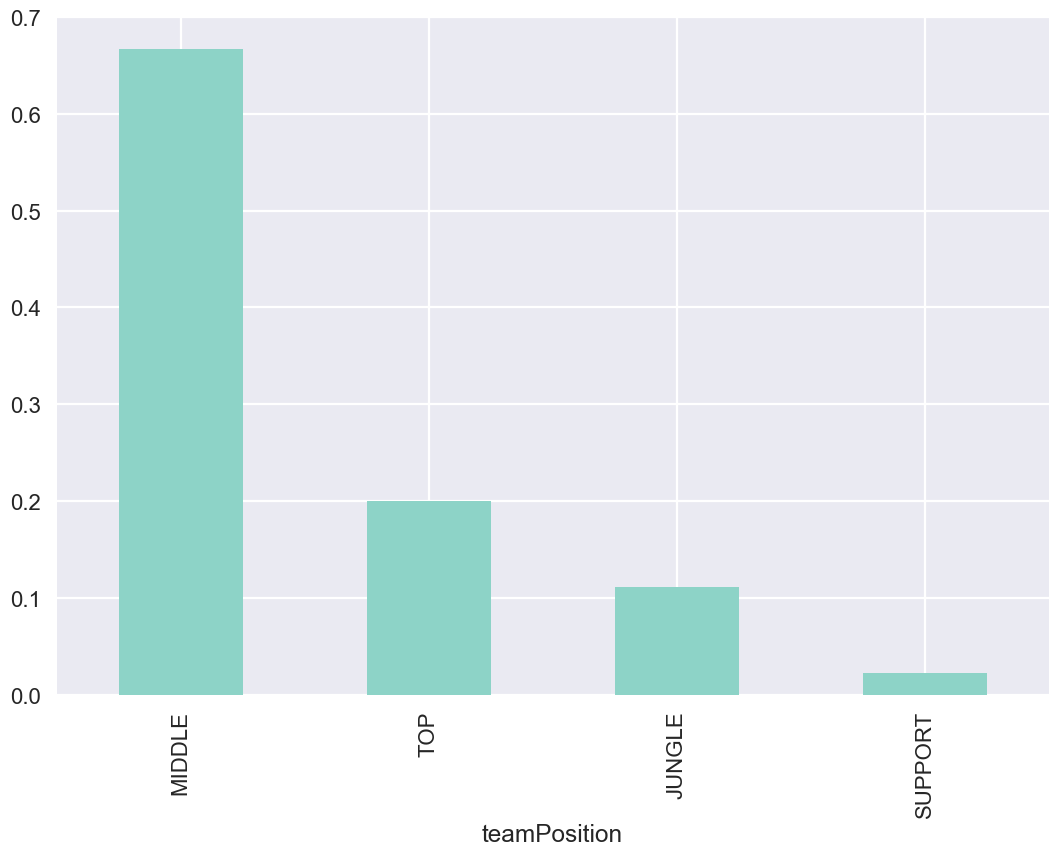

In [386]:
df["teamPosition"].value_counts(normalize=True).plot(kind="bar")

#### Percentage of Mid lane Champions

<Axes: ylabel='championName'>

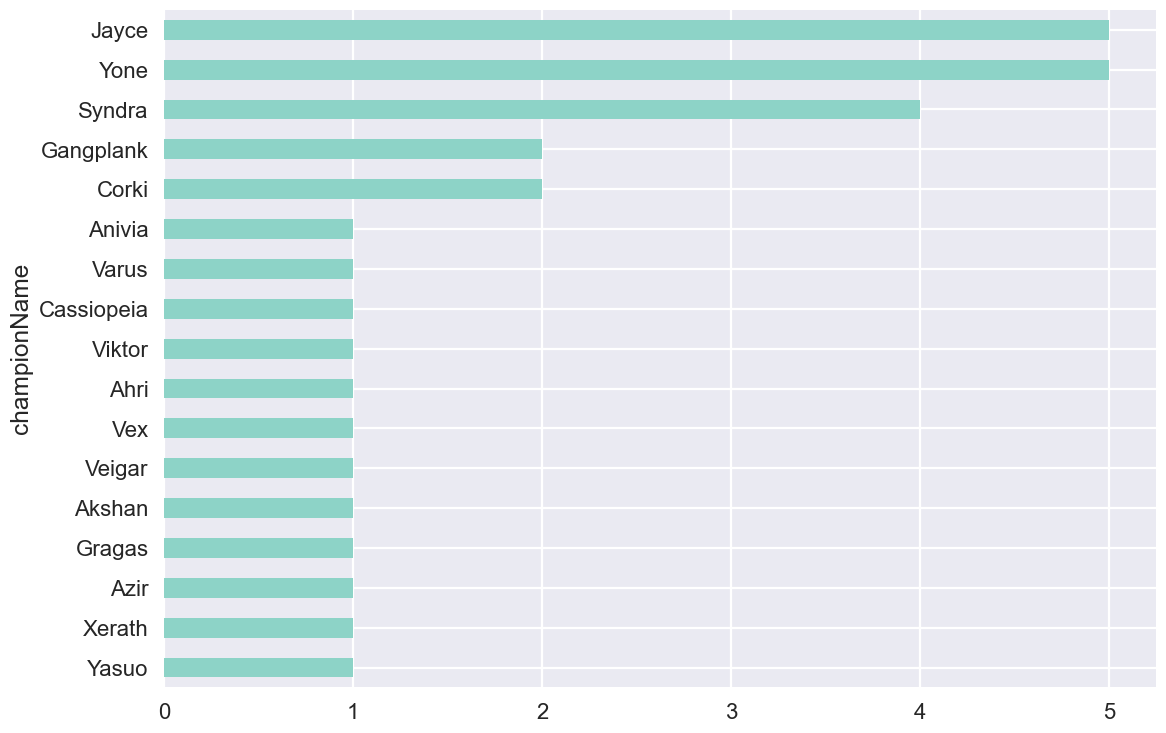

In [387]:
filt = df["teamPosition"] == "MIDDLE"
df.loc[filt, "championName"].value_counts().sort_values().plot(kind="barh")

In [388]:
# df.loc[filt, "championName"].value_counts(normalize=True).head(7).index
df.loc[filt, "championName"].value_counts(normalize=True)

championName
Jayce         0.166667
Yone          0.166667
Syndra        0.133333
Gangplank     0.066667
Corki         0.066667
Varus         0.033333
Cassiopeia    0.033333
Anivia        0.033333
Yasuo         0.033333
Vex           0.033333
Veigar        0.033333
Akshan        0.033333
Gragas        0.033333
Azir          0.033333
Xerath        0.033333
Ahri          0.033333
Viktor        0.033333
Name: proportion, dtype: float64

#### Get Top 5 % pickrate champions

In [389]:
# Calculate the normalized value counts for championName
value_counts_normalized = df['championName'].value_counts(normalize=True)

# Define a percentage threshold
percentage_threshold = 0.05

# Filter champion names with a percentage greater than the threshold
selected_champions = value_counts_normalized[value_counts_normalized > percentage_threshold].index
selected_champions

Index(['Jayce', 'Yone', 'Syndra', 'Brand', 'Azir'], dtype='object', name='championName')

<Axes: xlabel='championName'>

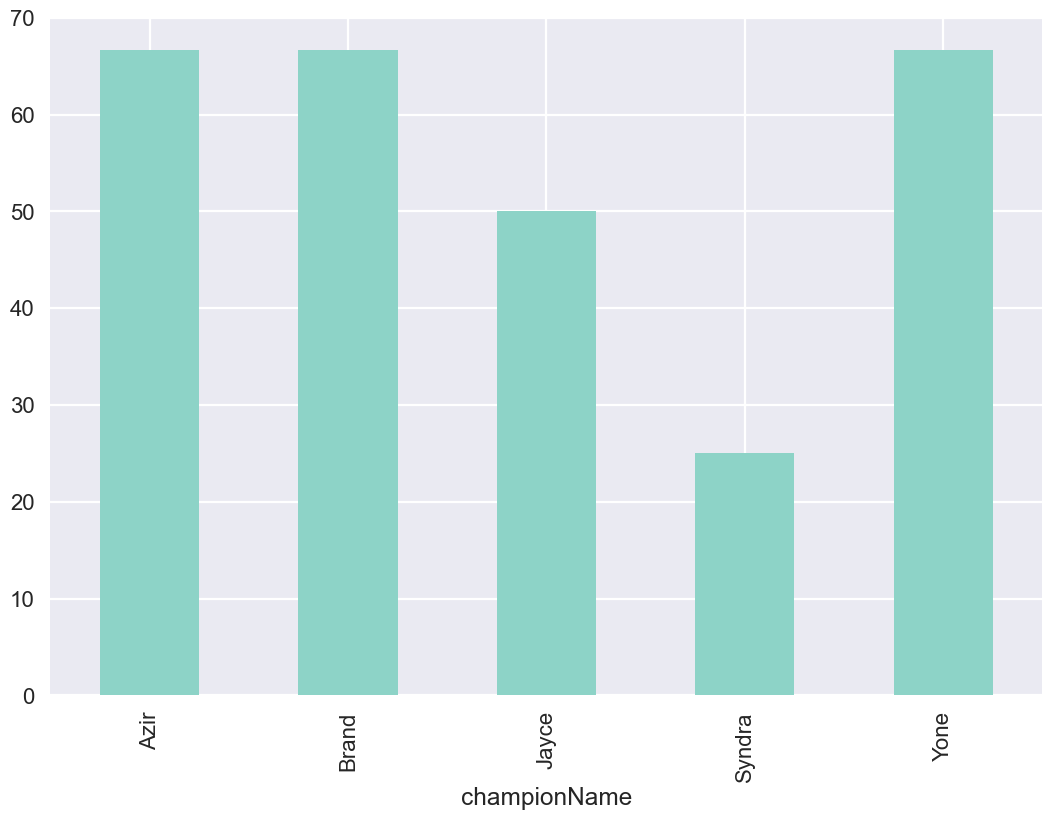

In [390]:
filt = df["championName"].isin(selected_champions)
win_rates = df.loc[filt].groupby("championName")["win"].value_counts(normalize=True, sort=True)[:, True] * 100
win_rates.plot(kind="bar")

#### Most Midlane opponents

<Axes: ylabel='laneOpponent'>

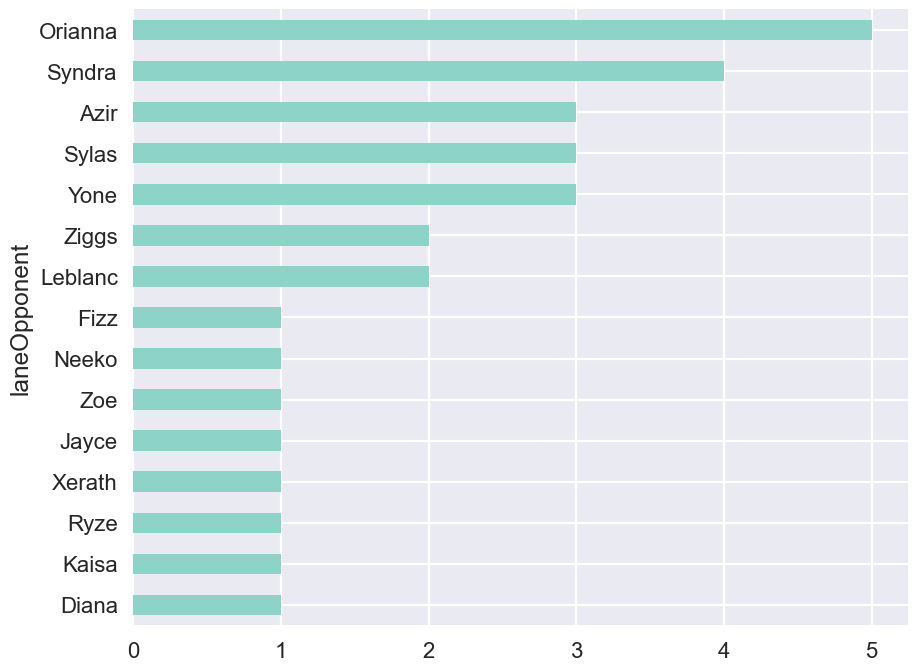

In [391]:
filt = df["teamPosition"] == "MIDDLE"
df.loc[filt, "laneOpponent"].value_counts().sort_values().plot(kind="barh", figsize=(10, 8))

In [392]:
# Calculate the normalized value counts for championName
value_counts_normalized = df.loc[filt, "laneOpponent"].value_counts(normalize=True)

# Define a percentage threshold
percentage_threshold = 0.05

# Filter lane opponents names with a percentage greater than the threshold
selected_lane_opponents = value_counts_normalized[value_counts_normalized > percentage_threshold].index
selected_lane_opponents

Index(['Orianna', 'Syndra', 'Yone', 'Sylas', 'Azir', 'Leblanc', 'Ziggs'], dtype='object', name='laneOpponent')

#### Winrate against the opponent champions in midlane with playrate >= 5 %

<Axes: xlabel='laneOpponent'>

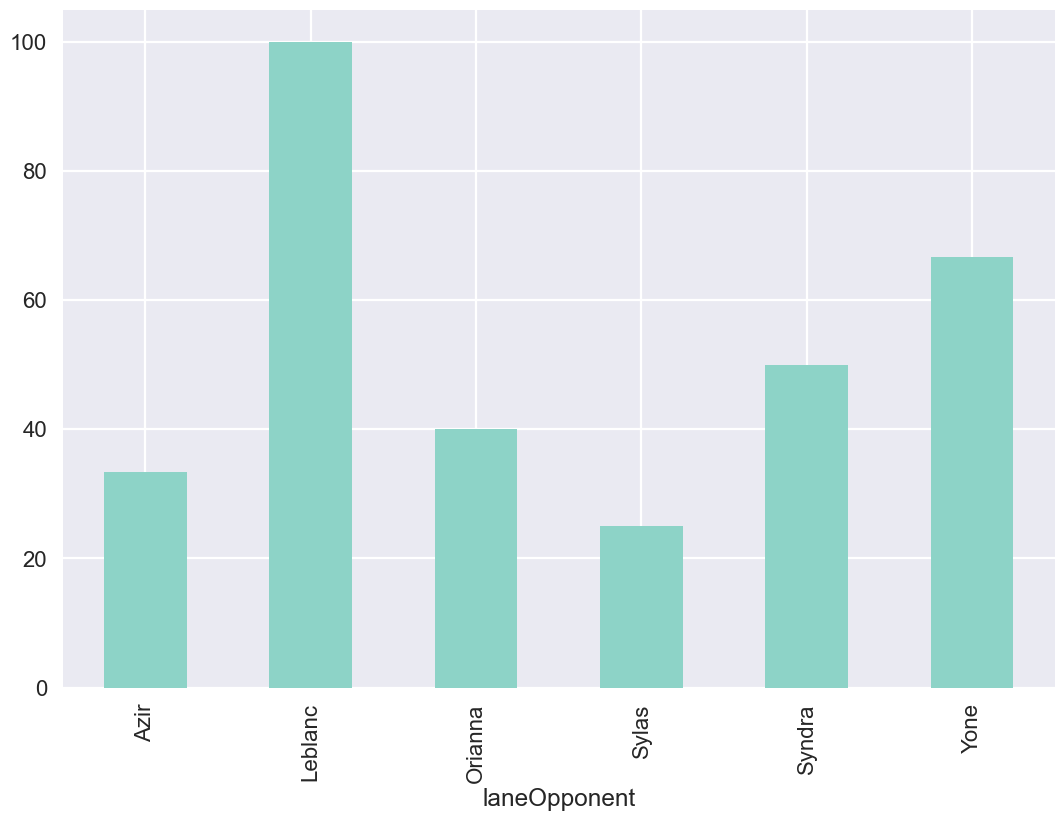

In [393]:
filt = df["laneOpponent"].isin(selected_lane_opponents)
win_rates_against = df.loc[filt].groupby("laneOpponent")["win"].value_counts(normalize=True, sort=True)[:, True] * 100
win_rates_against.plot(kind="bar")

#### Winrate for each lane

<Axes: xlabel='teamPosition'>

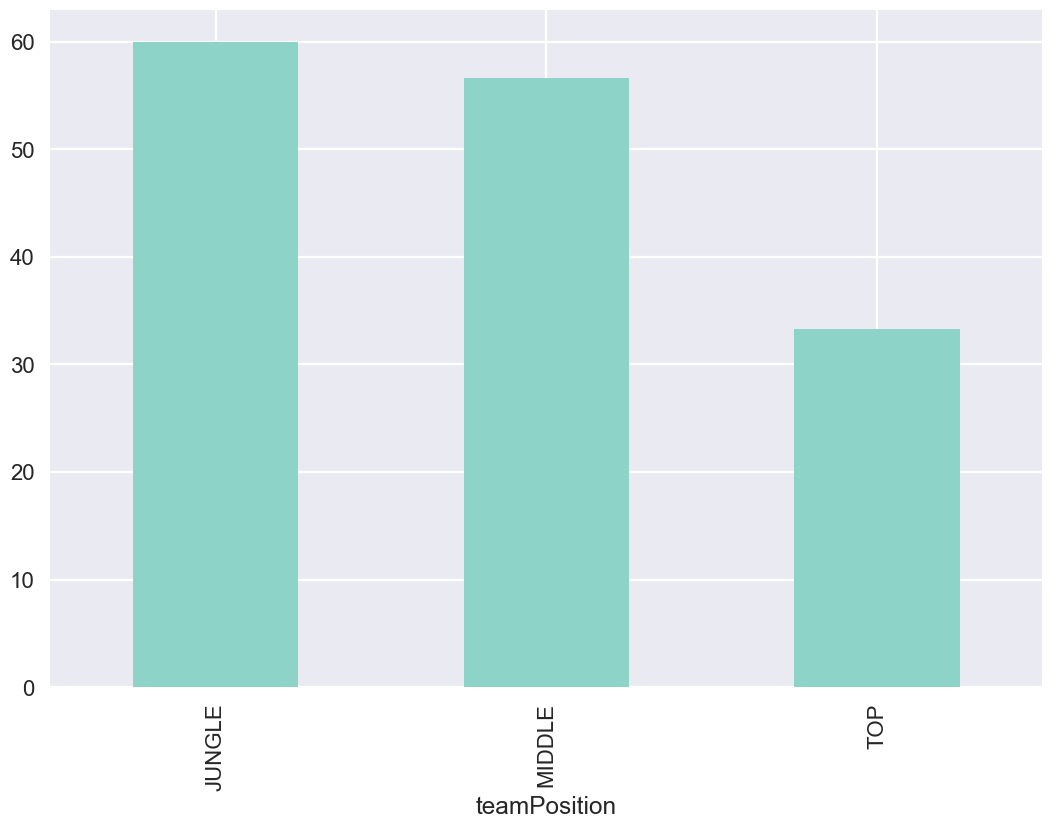

In [394]:
(df.groupby("teamPosition")["win"].value_counts(normalize=True)[:, True] * 100).plot(kind="bar")

#### winrates with champion in own team

* maybe change data frame that allyRolePick is NaN when teamPosition == Role

In [395]:
# Use melt to reshape the DataFrame into a long format
melted_df = pd.melt(df, value_vars=["allyTopPick", "allyJunglePick", "allyMiddlePick", "allyBottomPick", "allySupportPick"])

# Calculate value counts for the melted DataFrame
value_counts_result = melted_df['value'].value_counts()

print("Combined Value Counts:")
value_counts_result


Combined Value Counts:


value
Janna           10
Jayce            7
Yone             7
Varus            6
Syndra           6
Ezreal           6
Rakan            5
Graves           5
Ornn             4
Sylas            4
Yasuo            4
Kaisa            4
Brand            4
Ashe             4
Taliyah          4
Kayn             3
Orianna          3
Aphelios         3
Azir             3
Nunu             3
Blitzcrank       3
Renata           3
Renekton         3
Heimerdinger     3
Ziggs            3
Senna            3
Riven            3
Rumble           3
Gragas           3
Hecarim          2
Jinx             2
Karma            2
Draven           2
MonkeyKing       2
RekSai           2
Akshan           2
Aatrox           2
Corki            2
Jhin             2
Nilah            2
JarvanIV         2
Vayne            2
Thresh           2
Sona             2
Gnar             2
Leona            2
Kled             2
Pyke             2
Milio            2
Gwen             2
Taric            2
Evelynn          2
Noctur

#### Winrate on blue side

<Axes: xlabel='teamId'>

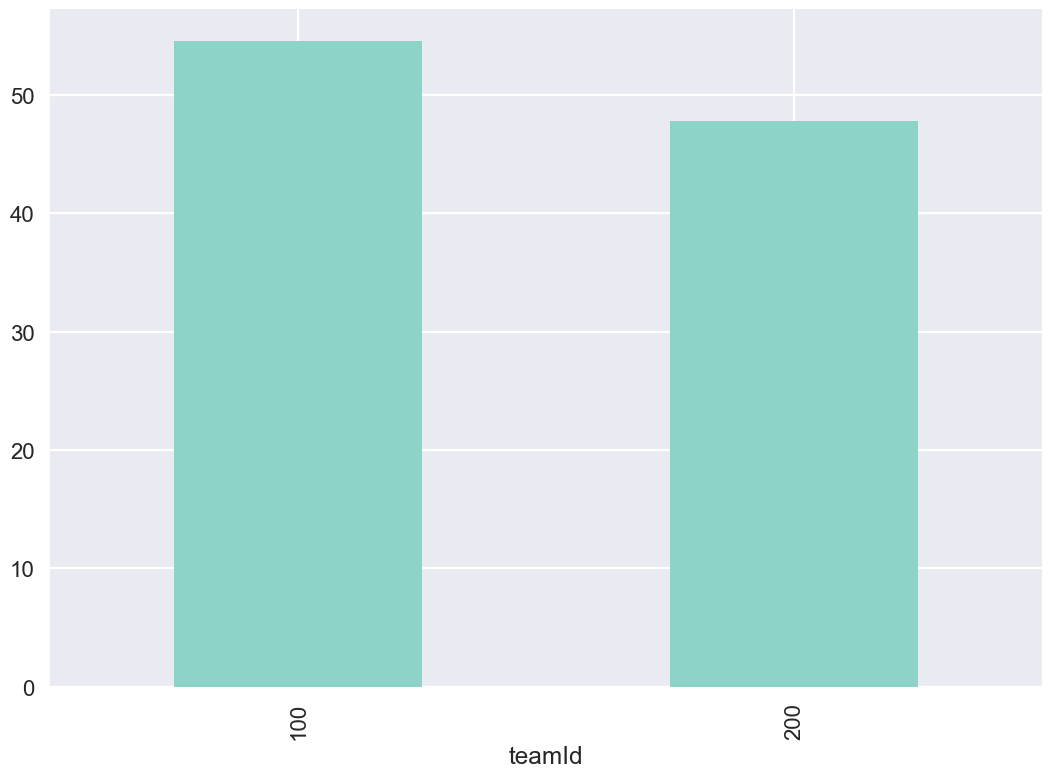

In [396]:
(df.groupby("teamId")["win"].value_counts(normalize=True)[:, True] * 100).plot(kind="bar")

#### Gold earn in wins

In [397]:
import matplotlib.pyplot as plt

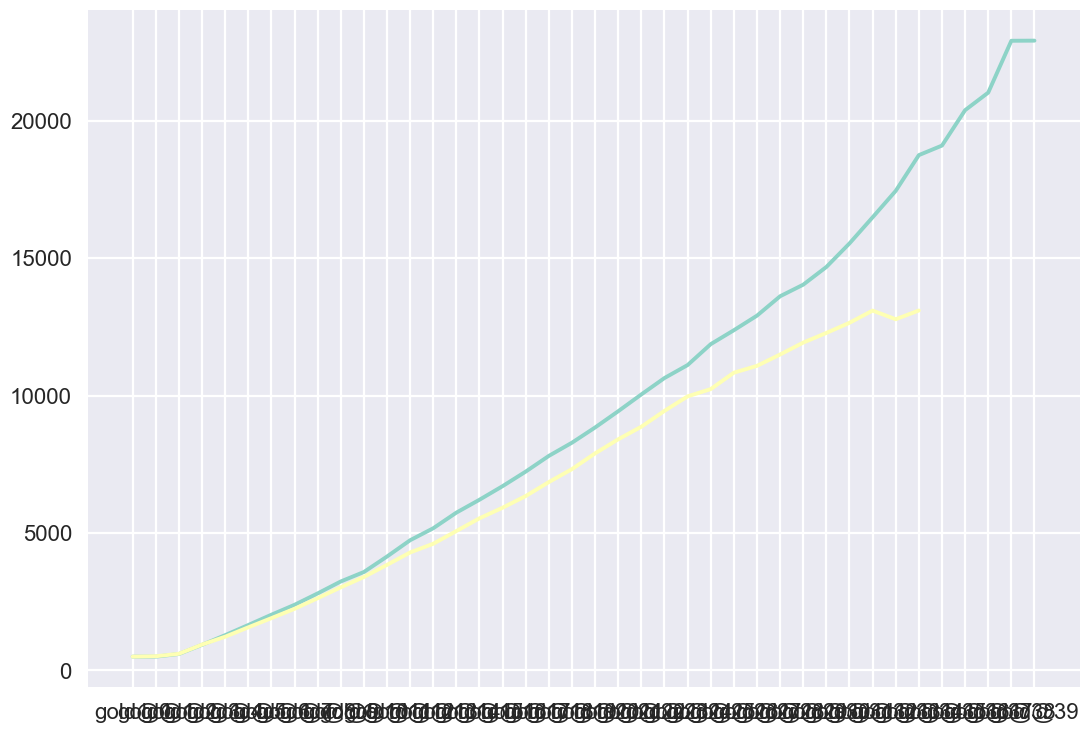

In [398]:
filt = df["win"]
df_wins  = df.loc[filt]

# Calculate the mean for the "gold" columns in the wins DataFrame
mean_gold_wins = df_wins.filter(like='gold@').mean(axis=0)

plt.plot(mean_gold_wins)

df_wins  = df.loc[~filt]

# Calculate the mean for the "gold" columns in the wins DataFrame
mean_gold_wins = df_wins.filter(like='gold@').mean(axis=0)

plt.plot(mean_gold_wins)

plt.show()

#### Gold diff to lane opponent in wins and loses

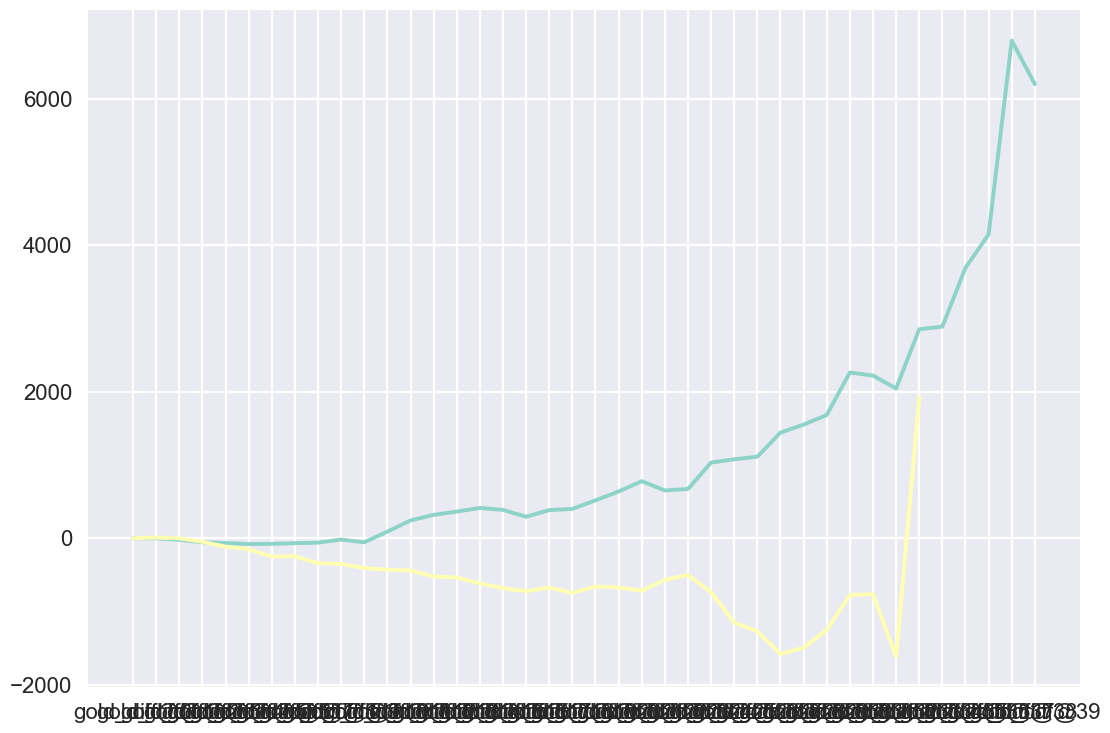

In [399]:
filt = df["win"]
df_wins  = df.loc[filt]

mean_gold_diff_wins = df_wins.filter(like='gold_diff@').mean(axis=0)
plt.plot(mean_gold_diff_wins)

df_loses  = df.loc[~filt]

mean_gold_diff_loses = df_loses.filter(like='gold_diff@').mean(axis=0)

plt.plot(mean_gold_diff_loses)

plt.show()

#### Average amount of Games per Session

<Axes: xlabel='session'>

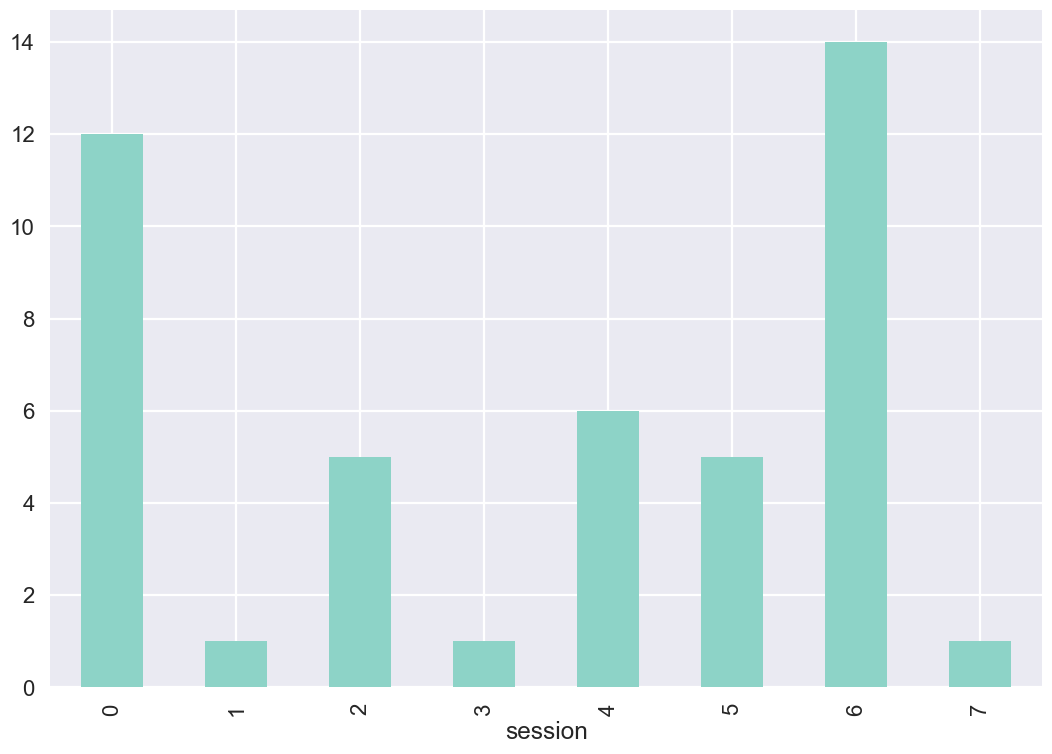

In [400]:
df["session"].value_counts(sort=False).plot(kind="bar")

#### Most banned Champion by Noway

* change to championName, championBanned: teamPosition == Middle -> allyMiddlePick = NaN

In [401]:
for role in df["teamPosition"].str.capitalize().values:
    print(df[f"ally{role}Ban"])

matchId
EUW1_6695408882        Rumble
EUW1_6695368930         Senna
EUW1_6695321491        Draven
EUW1_6695184961        Draven
EUW1_6695123207    Blitzcrank
EUW1_6695053848       Taliyah
EUW1_6694997822         Akali
EUW1_6694915579          Rell
EUW1_6694825401        Draven
EUW1_6694779676         Janna
EUW1_6694707006         Akali
EUW1_6694655020       Orianna
EUW1_6690742328         Akali
EUW1_6690340271          Pyke
EUW1_6690273863          Bard
EUW1_6690209986        KSante
EUW1_6690156907         Kaisa
EUW1_6690099176          Sion
EUW1_6689923193           Jax
EUW1_6689331845        Aatrox
EUW1_6689295775         Riven
EUW1_6689222286        Rengar
EUW1_6689156154       Kalista
EUW1_6689085093          Kayn
EUW1_6688996673        Draven
EUW1_6688644065         Akali
EUW1_6688587831      Malphite
EUW1_6688536055          Pyke
EUW1_6688478177        Draven
EUW1_6688424350         Viego
EUW1_6687907833         Rakan
EUW1_6687845324          Pyke
EUW1_6687764069    Blitzcrank
EU

#### Most played mid lane champion match ups

<Axes: ylabel='laneOpponent'>

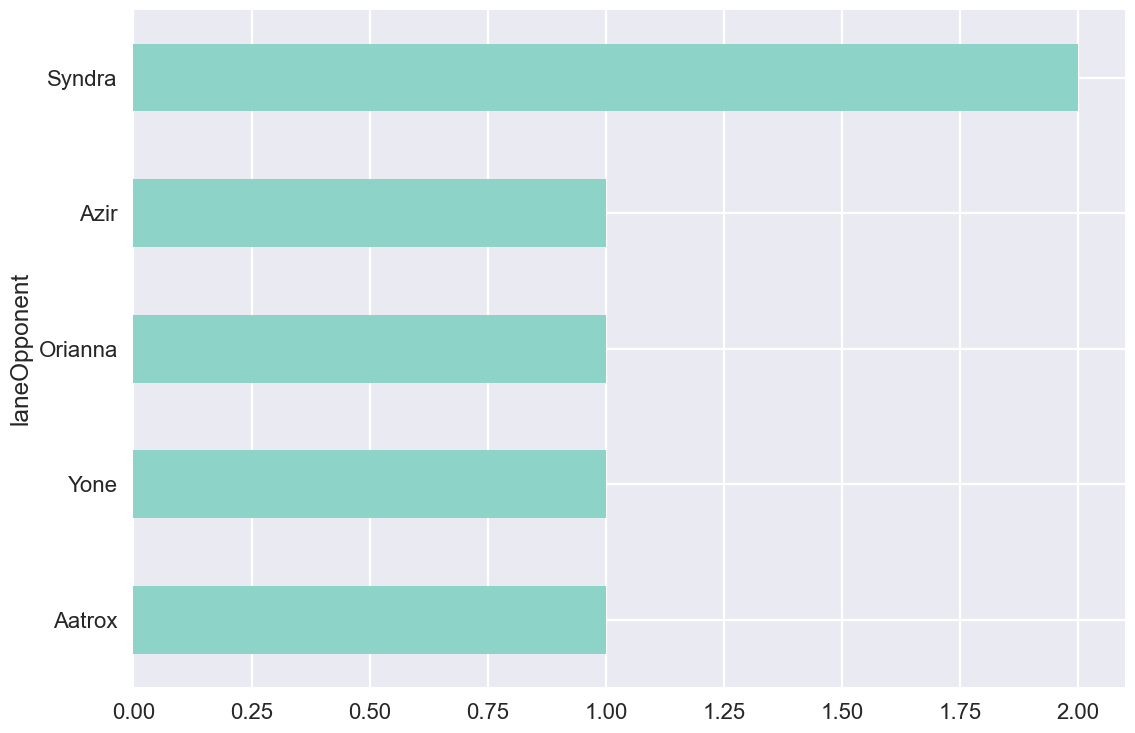

In [402]:
most_played_champion = df["championName"].value_counts().head(1).index.item()

filt = df["championName"] == most_played_champion
df.loc[filt, "laneOpponent"].value_counts().sort_values().plot(kind="barh")

#### most played against

<Axes: ylabel='laneOpponent'>

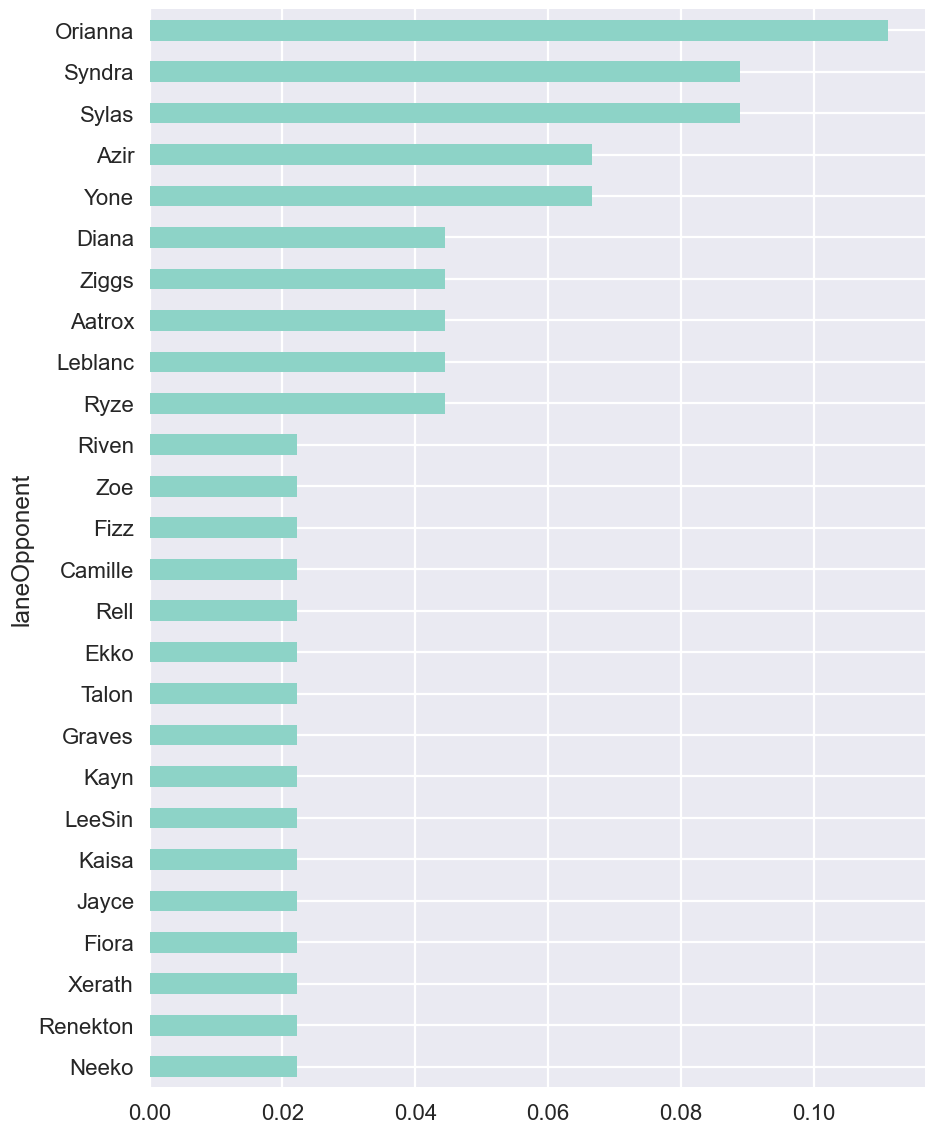

In [403]:
df["laneOpponent"].value_counts(normalize=True).sort_values().plot(kind="barh", figsize=(10, 14))

#### most picked enemy champion

In [404]:
melted_df = pd.melt(df, value_vars=["enemyTopPick", "enemyJunglePick", "enemyMiddlePick", "enemyBottomPick", "enemySupportPick"])

# Calculate value counts for the melted DataFrame
value_counts_result = melted_df['value'].value_counts()

print("Combined Value Counts:")
value_counts_result

Combined Value Counts:


value
Orianna         7
Syndra          7
LeeSin          6
Taliyah         6
Graves          6
Yone            6
Nautilus        5
Tryndamere      5
Jhin            5
Sylas           5
Rell            5
Kaisa           5
Ryze            4
Janna           4
Ezreal          4
Aatrox          4
Renekton        4
Thresh          4
Rengar          4
Ashe            4
Jinx            4
Azir            3
JarvanIV        3
Jayce           3
Ziggs           3
Xayah           3
Viego           3
Rakan           3
Shaco           3
Camille         3
Tristana        3
Blitzcrank      3
Pyke            3
Milio           3
Gwen            3
Senna           3
Varus           2
Kalista         2
Soraka          2
Vayne           2
Seraphine       2
Yasuo           2
Leblanc         2
Bard            2
Renata          2
Gnar            2
Diana           2
Olaf            2
Nocturne        2
Jax             2
Ekko            2
Darius          2
TwistedFate     2
Singed          1
Aphelios        1
Malp

#### champion combinations

* Mid / Jungle

<Axes: ylabel='enemyJunglePick,enemyMiddlePick'>

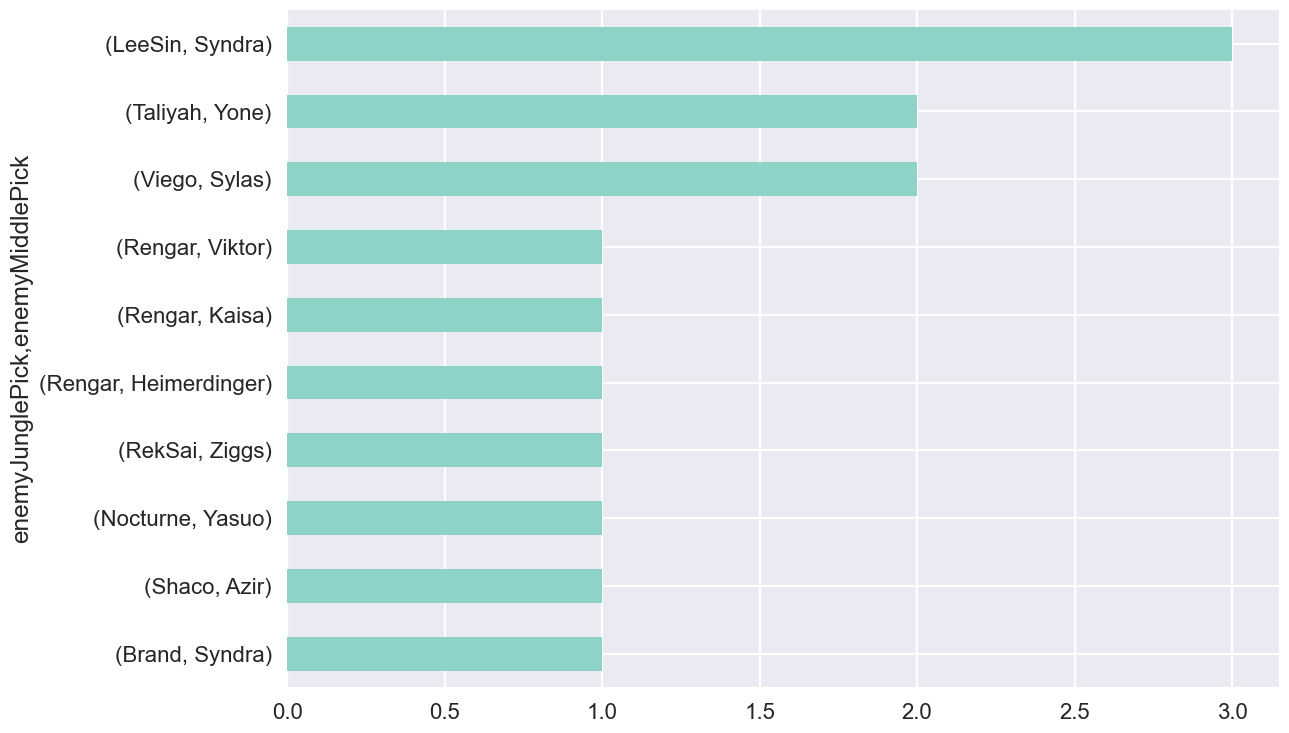

In [405]:
df[["enemyJunglePick", "enemyMiddlePick"]].value_counts().head(10).sort_values().plot(kind="barh")

<Axes: ylabel='allyJunglePick,allyMiddlePick'>

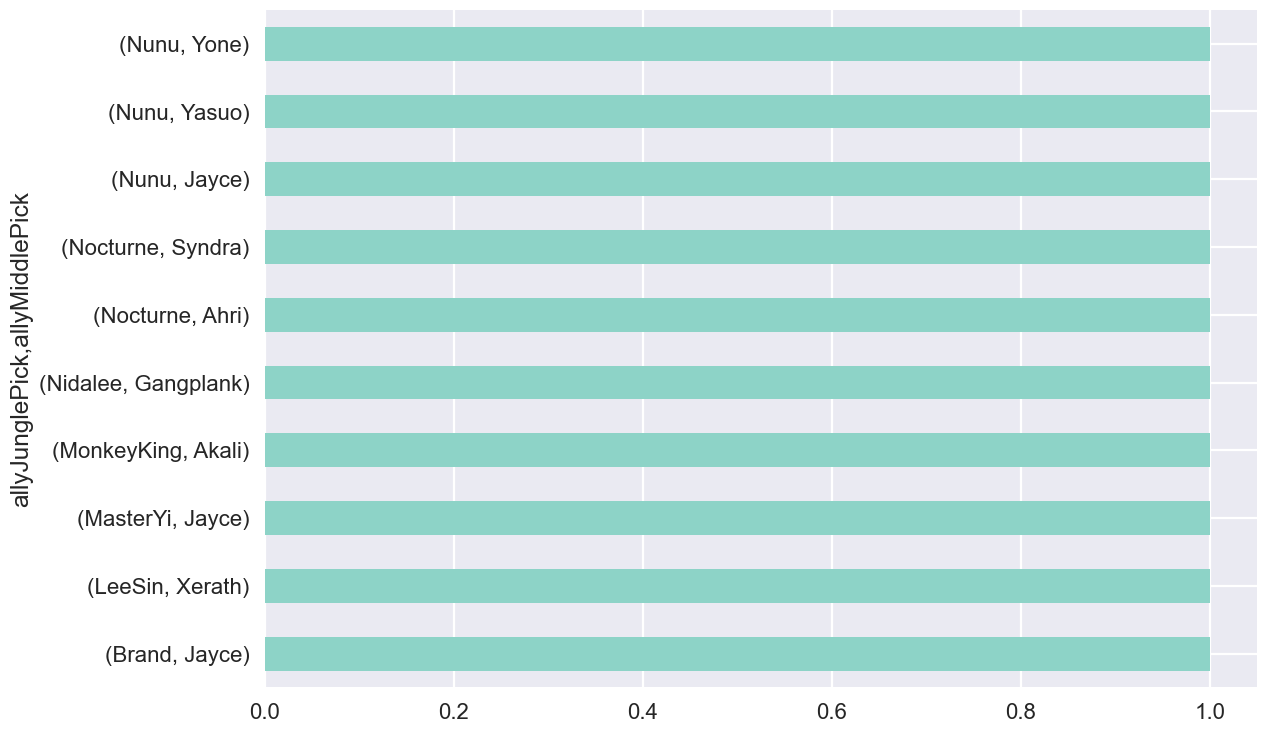

In [406]:
df[["allyJunglePick", "allyMiddlePick"]].value_counts().head(10).sort_values().plot(kind="barh")

* Bottom / Support

<Axes: ylabel='enemyBottomPick,enemySupportPick'>

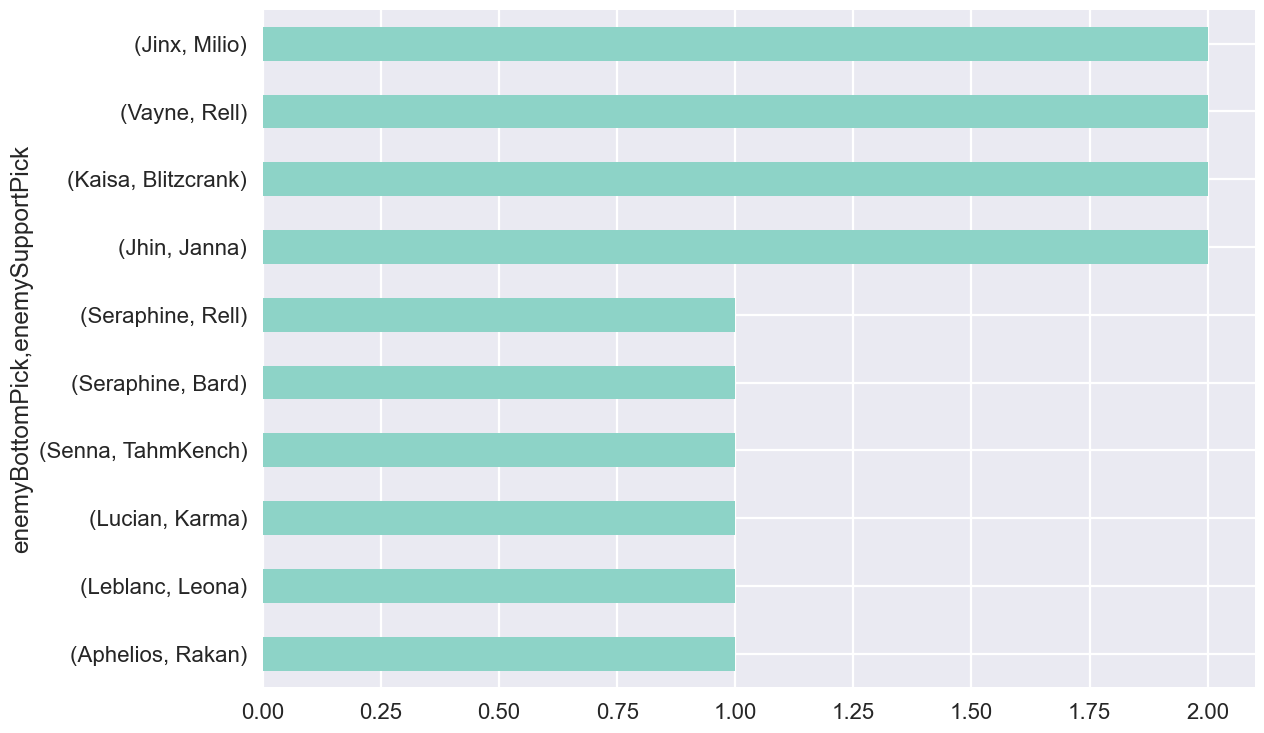

In [407]:
df[["enemyBottomPick", "enemySupportPick"]].value_counts().head(10).sort_values().plot(kind="barh")

<Axes: ylabel='allyBottomPick,allySupportPick'>

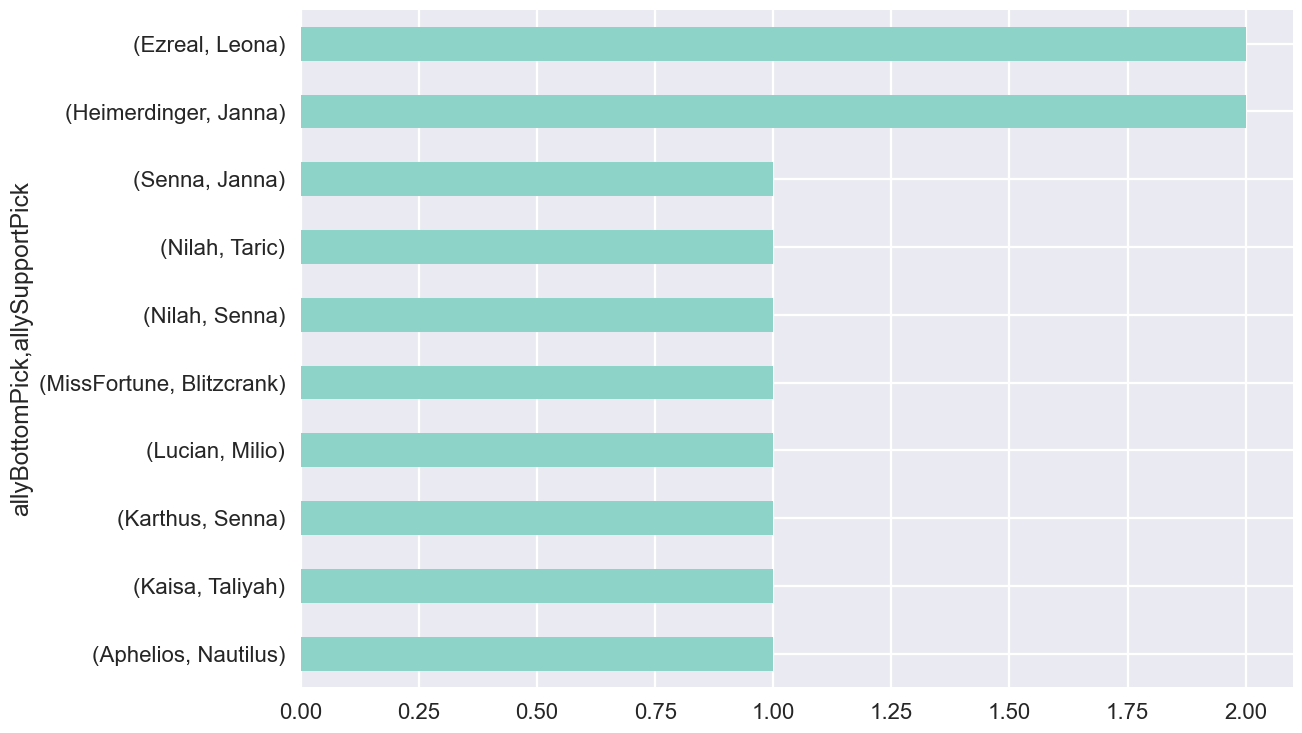

In [408]:
df[["allyBottomPick", "allySupportPick"]].value_counts().head(10).sort_values().plot(kind="barh")

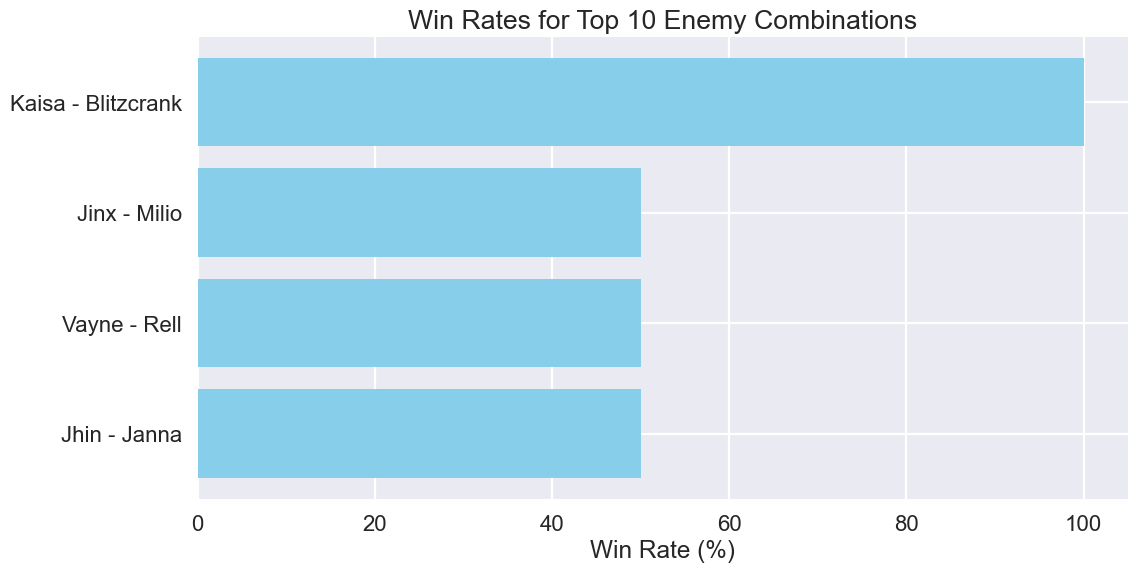

In [409]:
top_combinations = df[["enemyBottomPick", "enemySupportPick"]].value_counts().head(4)

# Initialize lists to store data for plotting
bottom_support_combinations = []
win_rates = []


for bottom, support in top_combinations.index:
    filt = (df["enemyBottomPick"] == bottom) & (df["enemySupportPick"] == support)
    win_rate = df.loc[filt, "win"].mean() * 100
    win_rate = win_rate if not pd.isna(win_rate) else 0

    bottom_support_combinations.append(f"{bottom} - {support}")
    win_rates.append(win_rate)


# Sort combinations by win rate
sorted_combinations = sorted(zip(bottom_support_combinations, win_rates), key=lambda x: x[1], reverse=False)

# Unpack the sorted pairs
sorted_combinations, sorted_win_rates = zip(*sorted_combinations)

# Plot all combinations in a single horizontal bar plot
plt.figure(figsize=(12, 6))
plt.barh(sorted_combinations, sorted_win_rates, color='skyblue')
plt.xlabel('Win Rate (%)')
plt.title('Win Rates for Top 10 Enemy Combinations')
plt.show()

In [410]:
filt = (df["enemyBottomPick"] == "Kaisa") & (df["enemySupportPick"] == "Nautilus")
df.loc[filt, "win"]

matchId
EUW1_6690742328    True
Name: win, dtype: bool

#### Average kills per game (both teams)

In [411]:
average_kills_per_game = (df["totalAllyTeamKills"] + df["totalAllyTeamDeaths"]).sum() / df.shape[0]
f"Average kills per game: {average_kills_per_game}"

'Average kills per game: 53.62222222222222'

#### Average kills per Minute

In [412]:
average_game_time_s = df["gameDuration"].sum() / df.shape[0]
average_kills_per_minute = average_kills_per_game / (average_game_time_s / 60)
f"Average kills per minute: {average_kills_per_minute}"

'Average kills per minute: 1.9453663517998467'

#### Winrate when first tower killed by noway

In [413]:
filt = (df["firstTowerKill"] == True) | (df["firstTowerAssist"] == True)
df.loc[filt, "win"].mean() * 100

60.0

#### Winrate when first blood by noway

In [414]:
filt = (df["firstBloodKill"] == True) | (df["firstBloodAssist"] == True)
df.loc[filt, "win"].mean() * 100

0.0

#### Percentage of games on blue side

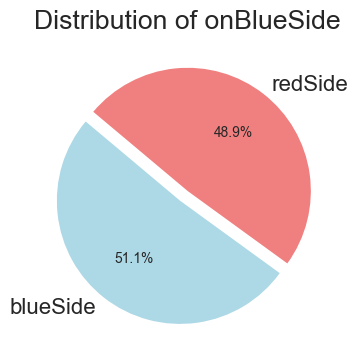

In [415]:
# Plotting the pie chart
plt.figure(figsize=(4, 4))
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # To emphasize the first slice
labels = ["blueSide", "redSide"] # df["onBlueSide"].value_counts().index
sizes = df["onBlueSide"].value_counts(normalize=True) * 100

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Distribution of onBlueSide')
plt.show()

#### Game time distribution

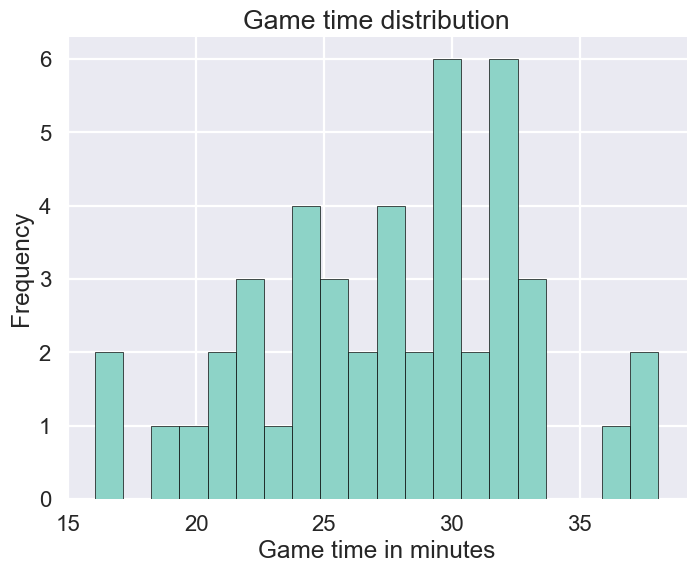

In [416]:
data = df["gameDuration"] / 60

# Plotting a histogram with bins
plt.figure(figsize=(8, 6))
plt.hist(data, bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.xlabel('Game time in minutes')
plt.ylabel('Frequency')
plt.title('Game time distribution')
plt.show()

#### correlation between deaths and win rate

In [417]:
(df.groupby("deaths")["win"].value_counts(normalize=True)[:, True] * 100)

deaths
1     100.000000
2     100.000000
3      33.333333
4      75.000000
5      66.666667
6      60.000000
7      33.333333
8      50.000000
9      20.000000
10     33.333333
Name: proportion, dtype: float64

In [418]:
filt = df["deaths"] == 11
df.loc[filt]

,gameCreation,gameEndTimestamp,gameDuration,gameVersion,kills,deaths,assists,championName,firstBloodAssist,firstBloodKill,firstTowerAssist,firstTowerKill,gameEndedInEarlySurrender,gameEndedInSurrender,goldEarned,magicDamageDealtToChampions,physicalDamageDealtToChampions,teamEarlySurrendered,teamPosition,totalDamageDealtToChampions,totalTimeSpentDead,wardsKilled,wardsPlaced,win,teamId,enemyTopPick,enemyJunglePick,enemyMiddlePick,enemyBottomPick,enemySupportPick,allyTopPick,allyJunglePick,allyMiddlePick,allyBottomPick,allySupportPick,laneOpponent,enemyTopBan,enemyJungleBan,enemyMiddleBan,enemyBottomBan,enemySupportBan,allyTopBan,allyJungleBan,allyMiddleBan,allyBottomBan,allySupportBan,Maxi,Moritz,Niclas,Aaron,totalAllyTeamKills,totalAllyTeamDeaths,gold@0,gold@1,gold@2,gold@3,gold@4,gold@5,gold@6,gold@7,gold@8,gold@9,gold@10,gold@11,gold@12,gold@13,gold@14,gold@15,gold@16,gold@17,gold@18,gold@19,gold@20,gold@21,gold@22,gold@23,gold@24,gold@25,gold@26,gold@27,gold@28,gold@29,gold@30,gold@31,gold@32,gold_diff@0,gold_diff@1,gold_diff@2,gold_diff@3,gold_diff@4,gold_diff@5,gold_diff@6,gold_diff@7,gold_diff@8,gold_diff@9,gold_diff@10,gold_diff@11,gold_diff@12,gold_diff@13,gold_diff@14,gold_diff@15,gold_diff@16,gold_diff@17,gold_diff@18,gold_diff@19,gold_diff@20,gold_diff@21,gold_diff@22,gold_diff@23,gold_diff@24,gold_diff@25,gold_diff@26,gold_diff@27,gold_diff@28,gold_diff@29,gold_diff@30,gold_diff@31,gold_diff@32,cs@0,cs@1,cs@2,cs@3,cs@4,cs@5,cs@6,cs@7,cs@8,cs@9,cs@10,cs@11,cs@12,cs@13,cs@14,cs@15,cs@16,cs@17,cs@18,cs@19,cs@20,cs@21,cs@22,cs@23,cs@24,cs@25,cs@26,cs@27,cs@28,cs@29,cs@30,cs@31,cs@32,deathBeforeMin5,totalTeamGoldDiff@5,totalTeamGoldDiff@10,totalTeamGoldDiff@15,totalTeamGoldDiff@20,puuid,gold@33,gold_diff@33,cs@33,gold@34,gold_diff@34,cs@34,gold@35,gold@36,gold@37,gold@38,gold_diff@35,gold_diff@36,gold_diff@37,gold_diff@38,cs@35,cs@36,cs@37,cs@38,gold@39,gold_diff@39,cs@39,gameDuration_m_s,onBlueSide,timeBetweenGames,session
matchId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
EUW1_6640218914,2023-10-20 16:58:20,2023-10-20 17:31:13,1923,13.20,3,11,8,Corki,False,False,False,False,False,True,12984,23068,2947,False,MIDDLE,26778,392,0,13,False,200,Tryndamere,RekSai,Ziggs,Kaisa,Thresh,Irelia,Viego,Corki,Sivir,Velkoz,Ziggs,Rell,Caitlyn,Vayne,Taliyah,Zed,Vayne,JarvanIV,Kassadin,Briar,Pyke,False,False,False,False,27,54,500,500,632,1034,1354,1718,2138,2522,2822,3227,3543,3804,5197,5396,5777,6850,7106,7569,7825.0,8248.0,8876.0,9198.0,9474.0,9681.0,10197.0,10424.0,10756.0,11226.0,11872.0,12192.0,12496.0,12619.0,12979.0,0,0,34,79,164,217,332,440,473,257,-118,-715,513,241,352,1014,913,567,568.0,805.0,963.0,657.0,595.0,5.0,306.0,209.0,-161.0,-368.0,-443.0,-295.0,-426.0,-726.0,-948.0,0,0,6,18,28,39,52,66,73,84,95,102,110,115,126,139,145,148,148.0,159.0,182.0,189.0,189.0,189.0,195.0,201.0,209.0,221.0,227.0,232.0,232.0,232.0,242.0,False,498,275,-235,-2478.0,Ojis3-jBDzeNHW325uynG8LlhWw5E1QqujrzHQy_w8GiFG...,12984.0,-948.0,242.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32:03,False,32 days 21:52:32,7


<Axes: xlabel='deaths'>

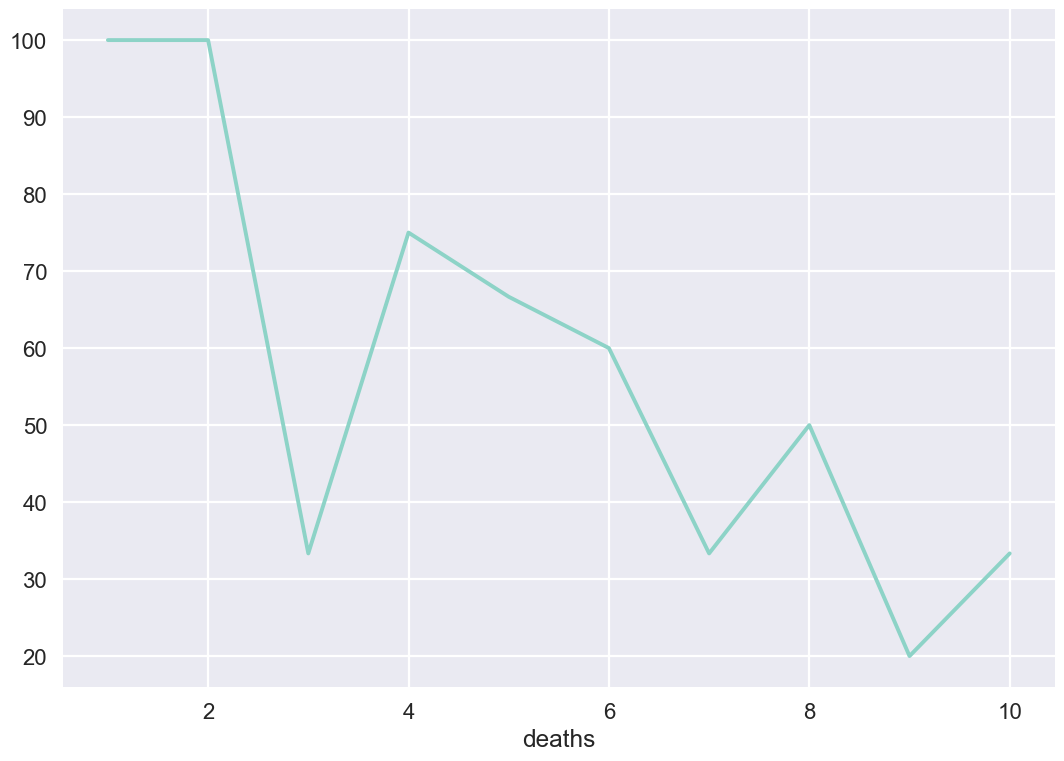

In [419]:
(df.groupby("deaths")["win"].value_counts(normalize=True)[:, True] * 100).plot()

#### Aufteilung Queue-time, totalTimeSpentDead, Gameplay

<Axes: title={'center': 'Total time in percentage'}>

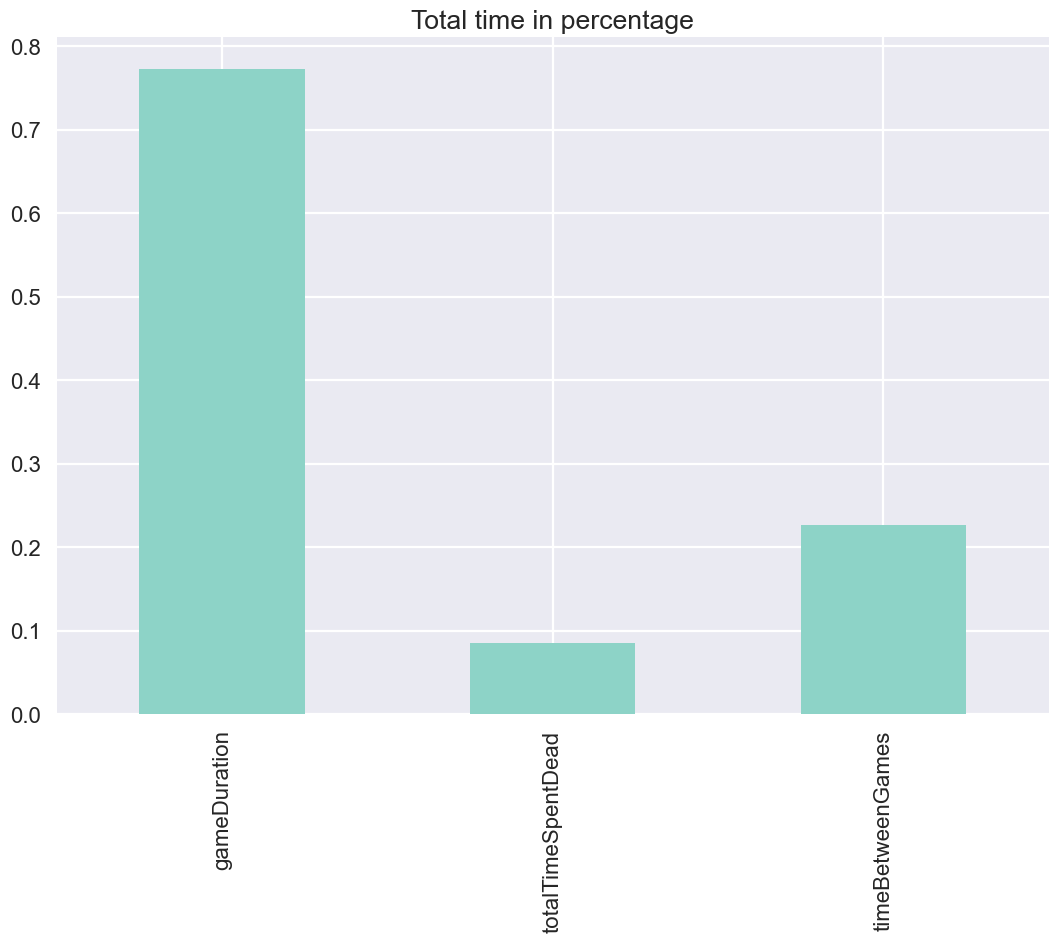

In [420]:
total_game_time_s = df["gameDuration"].sum()
total_time_spent_dead_s = df["totalTimeSpentDead"].sum()
filt = df["timeBetweenGames"] <= pd.Timedelta(minutes=25)
queue_time_s = df.loc[filt, "timeBetweenGames"].sum().total_seconds()

overall_time = total_game_time_s + queue_time_s

df.agg(
    {
        "gameDuration": lambda x: x.sum() / overall_time, #/ 3600,
        "totalTimeSpentDead": lambda x: x.sum() / overall_time, #/ 3600,
        "timeBetweenGames": lambda x: x.loc[x <= pd.Timedelta(minutes=25)].sum().total_seconds() / overall_time, #/ 3600
    }
).plot(kind="bar", title="Total time in percentage")

# overall_time = total_game_time_s + queue_time_s
# overall_time

# total_game_time_s / overall_time
# total_time_spent_dead_s / overall_time
# queue_time_s / overall_time

#### Percentage of time playing mid vs off role

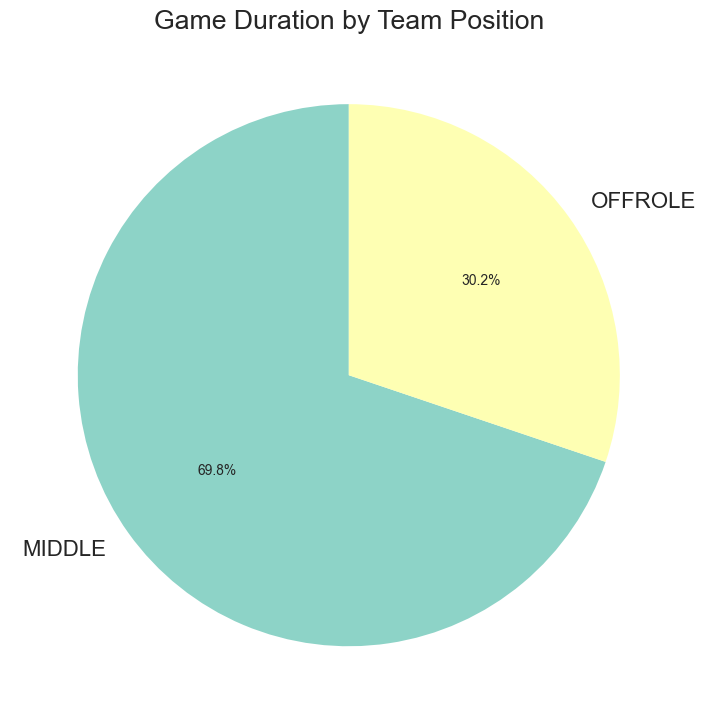

In [421]:
# Add a new category for roles except MIDDLE
df['teamPosition'] = df['teamPosition'].replace({'TOP': 'OFFROLE', 'JUNGLE': 'OFFROLE', 'BOTTOM': 'OFFROLE', 'SUPPORT': 'OFFROLE'})

# Group by the modified teamPosition and calculate the sum of gameDuration
grouped_data = df.groupby("teamPosition")["gameDuration"].sum()

# Plot the pie chart
grouped_data.plot(kind="pie", autopct='%1.1f%%', startangle=90)
plt.title("Game Duration by Team Position")
plt.ylabel("")  # Remove y-axis label
plt.show()

#### Winrate if died before min 5

In [422]:
filt = df["deathBeforeMin5"]
df.loc[~filt, "win"].value_counts(normalize=True)
# df.loc[filt].shape[0] / df.shape[0]

win
True     0.586207
False    0.413793
Name: proportion, dtype: float64

In [423]:
cols = ["totalTeamGoldDiff@5", "totalTeamGoldDiff@10", "totalTeamGoldDiff@15", "totalTeamGoldDiff@20", "win"]
df[cols]


,totalTeamGoldDiff@5,totalTeamGoldDiff@10,totalTeamGoldDiff@15,totalTeamGoldDiff@20,win
matchId,,,,,
EUW1_6695408882,-107,-1439,-1702,-4551.0,True
EUW1_6695368930,953,2530,3415,8079.0,True
EUW1_6695321491,-3170,-7051,-9625,-8967.0,False
EUW1_6695184961,-378,781,2994,8218.0,True
EUW1_6695123207,-1658,-1282,-6662,NaN,False
EUW1_6695053848,-659,-1648,920,-1535.0,False
EUW1_6694997822,-790,-2461,-4267,NaN,False
EUW1_6694915579,-536,-1440,-2236,-3860.0,True
EUW1_6694825401,-617,-4750,-8380,-4835.0,False


In [424]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


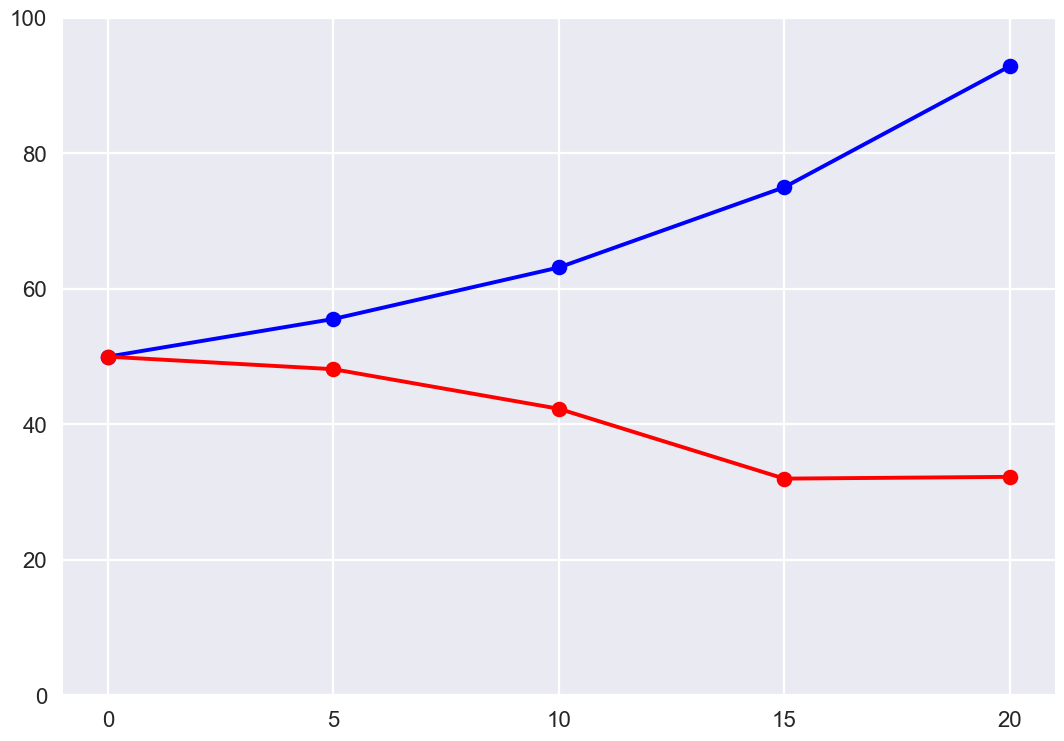

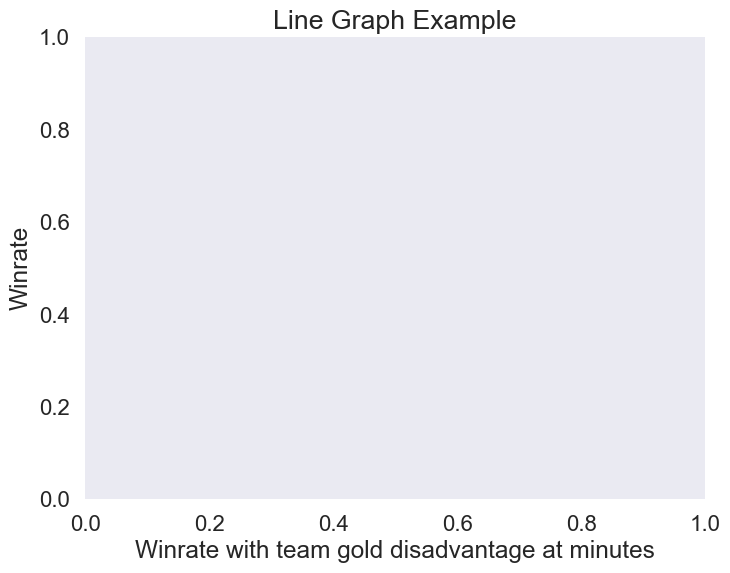

In [425]:
import matplotlib.pyplot as plt

# Set the size of the figure
plt.figure(figsize=(8, 6))

cols = ["totalTeamGoldDiff@5", "totalTeamGoldDiff@10", "totalTeamGoldDiff@15", "totalTeamGoldDiff@20"]

x_values = [0]
y_values_adv = [50]
y_values_dis = [50]

for col in cols:
    filt = df[col] > 0
    x_values.append(col.replace("totalTeamGoldDiff@", ""))
    y_values_adv.append(df.loc[filt, "win"].value_counts(normalize=True)[True] * 100)
    y_values_dis.append(df.loc[~filt, "win"].value_counts(normalize=True)[True] * 100)

# Plot the line graph
plt.plot(x_values, y_values_adv, label="Winrate at Gold Advantage", color="blue", marker="o")
plt.plot(x_values, y_values_dis, label="Winrate at Gold Disadvantage", color="red", marker="o")

plt.ylim(0, 100)

# Add labels and title
plt.xlabel('Winrate with team gold disadvantage at minutes')
plt.ylabel('Winrate')
plt.title('Line Graph Example')

plt.legend()
plt.grid()

# Show the plot
plt.show()
